# Analysis data in the Michigan Scramjet Simulation

In [60]:
import numpy as np
import yt
import matplotlib.pyplot as plt

def getWallPressure(ds, T):
  # Containers
  x = []
  p_mean = []
  p_var = []

  # [isolator, cavity floor, diffuser]
  line_start = [(-7.62, 1e-3, 0), (4.45, -1.269, 0), (9.525, 0, 0)]
  line_end = [(4.45, 1e-3, 0), (9.525, -1.269, 0), (15.24, -0.399, 0)]

  for (ls, le) in zip(line_start, line_end):
    lineout = ds.ray(ls, le)
    srt = np.argsort(lineout["x"])
    x.append(np.array(lineout["x"][srt]))
    p_mean.append(np.array(lineout["time_avg_p"][srt]) / T)
    p_var.append(np.array(lineout["mean_squared_p"][srt]) / T - (np.array(lineout["time_avg_p"][srt]) / T)**2)

  return x, p_mean, p_var

def getVelocityProfile(ds, T, xloc=(2,4,6,8,16)):
  D = 0.249 # jet diameter

  # Containers
  y = []
  u_mean = []
  v_mean = []
  
  for x in xloc:
    lineout = ds.ray((x*D, 0, 0), (x*D, 2.54, 0))
    srt = np.argsort(lineout["y"])
    y.append(np.array(lineout["y"][srt]) / D)
    u_mean.append(np.array(lineout["time_avg_u"][srt]) / T)
    v_mean.append(np.array(lineout["time_avg_v"][srt]) / T)
  
  return y, u_mean, v_mean

def getSpeciesProfile(ds, T, xloc=(-1,0,1,4,6)):
  D = 0.249 # jet diameter

  # Containers
  y = []
  H2_mean = []
  OH_mean = []
  O2_mean = []
  
  for x in xloc:
    lineout = ds.ray((x*D, 0, 0), (x*D, 2.54, 0))
    srt = np.argsort(lineout["y"])
    y.append(np.array(lineout["y"][srt]) / D)
    H2_mean.append(np.array(lineout["time_avg_Y_H2"][srt]) / T)
    OH_mean.append(np.array(lineout["time_avg_Y_OH"][srt]) / T)
    O2_mean.append(np.array(lineout["time_avg_Y_O2"][srt]) / T)
  
  return y, H2_mean, OH_mean, O2_mean

def getSpeciesLine(ds, T, yloc=1.0):
  D = 0.249 # jet diameter
  
  lineout = ds.ray((-7.62, yloc*D, 0), (15.24, yloc*D, 0))
  srt = np.argsort(lineout["x"])
  x = np.array(lineout["x"][srt]) / D
  H2_mean = np.array(lineout["time_avg_Y_H2"][srt]) / T
  OH_mean = np.array(lineout["time_avg_Y_OH"][srt]) / T
  O2_mean = np.array(lineout["time_avg_Y_O2"][srt]) / T
  
  return x, H2_mean, OH_mean, O2_mean

In [67]:
p0i = 590.0e4
H = 2.54

# t0 = 0.0
t0 = 0.0008567235030343094 # chk10000

ds = yt.load("~/plt00800")
T = np.float64(ds.current_time) - 0 # time for averaging
print(T)

x, p_mean, p_var = getWallPressure(ds, T)
y, u_mean, v_mean = getVelocityProfile(ds, T)
ys, H2_mean, OH_mean, O2_mean = getSpeciesProfile(ds, T)
xl, H2_l, OH_l, O2_l = getSpeciesLine(ds, T)

# ds = yt.load("~/plt00800")
# T = np.float64(ds.current_time) - 0 # time for averaging
# print(T)

# x2, p_mean2, p_var2 = getWallPressure(ds, T)
# y2, u_mean2, v_mean2 = getVelocityProfile(ds, T)
# ys2, H2_mean2, OH_mean2, O2_mean2 = getSpeciesProfile(ds, T)
# xl2, H2_l2, OH_l2, O2_l2 = getSpeciesLine(ds, T)

yt : [INFO     ] 2023-11-14 17:53:29,618 Parameters: current_time              = 5.57283771544165e-05
yt : [INFO     ] 2023-11-14 17:53:29,620 Parameters: domain_dimensions         = [192  32  32]
yt : [INFO     ] 2023-11-14 17:53:29,621 Parameters: domain_left_edge          = [-7.62  -1.27  -1.905]
yt : [INFO     ] 2023-11-14 17:53:29,622 Parameters: domain_right_edge         = [15.24   2.54   1.905]


5.57283771544165e-05


Text(0.5, 0, '$x/H$')

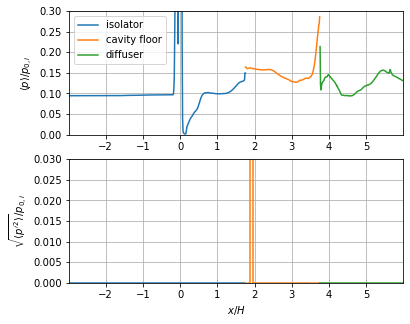

In [68]:
plt.figure(figsize=(6,5))

plt.subplot(2,1,1)
for i in range(3):
  plt.plot(x[i]/H, p_mean[i]/p0i)
  # plt.plot(x2[i]/H, p_mean2[i]/p0i, '--')
plt.ylabel(r"$\langle p\rangle / p_{0,i}$")
plt.xlim((x[0][0]/H, x[-1][-1]/H))
plt.ylim((0, 0.3))
plt.grid()
plt.legend(["isolator", "cavity floor", "diffuser"])

plt.subplot(2,1,2)
for i in range(3):
  plt.plot(x[i]/H, np.sqrt(np.maximum(p_var[i], 0.0))/p0i)
  # plt.plot(x2[i]/H, np.sqrt(np.maximum(p_var2[i], 0.0))/p0i, '--')
plt.xlim((x[0][0]/H, x[-1][-1]/H))
plt.ylim((0, 0.03))
plt.grid()
plt.ylabel(r"$\sqrt{\langle {p^\prime}^2\rangle} / p_{0,i}$")
plt.xlabel(r"$x/H$")

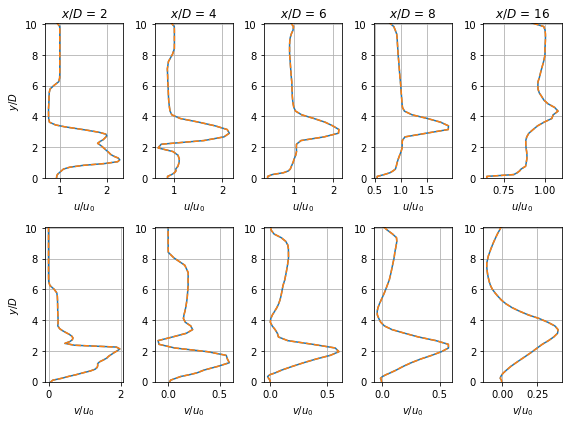

In [63]:
plt.figure(figsize=(8,6))
u0 = 107575
xloc=(2,4,6,8,16)

for i in range(5):
  plt.subplot(2,5,i+1)
  plt.plot(u_mean[i]/u0, y[i])
  plt.plot(u_mean2[i]/u0, y2[i], '--')
  plt.ylim((y[i][0], y[i][-1]))
  plt.xlabel(r"$u/u_0$")
  plt.title(r"$x/D$ = "+str(xloc[i]))
  plt.grid()

  plt.subplot(2,5,i+6)
  plt.plot(v_mean[i]/u0, y[i])
  plt.plot(v_mean2[i]/u0, y2[i], '--')
  plt.ylim((y[i][0], y[i][-1]))
  plt.xlabel(r"$v/u_0$")
  plt.grid()

  if i == 0:
    plt.subplot(2,5,i+1)
    plt.ylabel(r"$y/D$")
    plt.subplot(2,5,i+6)
    plt.ylabel(r"$y/D$")

plt.tight_layout()

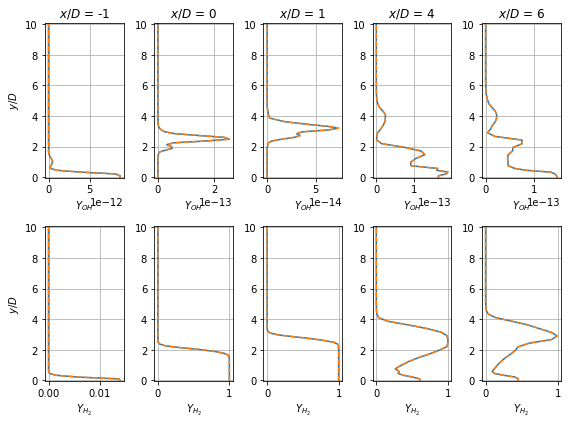

In [64]:
plt.figure(figsize=(8,6))
xloc=(-1,0,1,4,6)

for i in range(5):
  plt.subplot(2,5,i+1)
  plt.plot(OH_mean[i], ys[i])
  plt.plot(OH_mean2[i], ys2[i], '--')
  plt.ylim((y[i][0], y[i][-1]))
  plt.xlabel(r"$Y_{OH}$")
  plt.title(r"$x/D$ = "+str(xloc[i]))
  plt.grid()

  plt.subplot(2,5,i+6)
  plt.plot(H2_mean[i], ys[i])
  plt.plot(H2_mean2[i], ys2[i], '--')
  plt.ylim((y[i][0], y[i][-1]))
  plt.xlabel(r"$Y_{H_2}$")
  plt.grid()

  if i == 0:
    plt.subplot(2,5,i+1)
    plt.ylabel(r"$y/D$")
    plt.subplot(2,5,i+6)
    plt.ylabel(r"$y/D$")

plt.tight_layout()

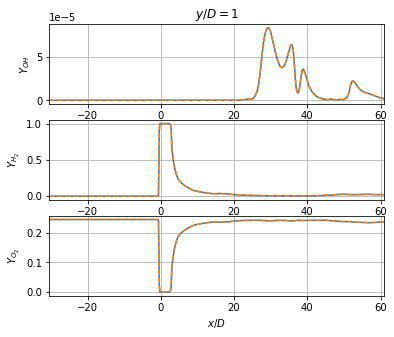

In [65]:
plt.figure(figsize=(6,5))

plt.subplot(3,1,1)
plt.plot(xl, OH_l)
plt.plot(xl2, OH_l2, '--')
plt.ylabel(r"$Y_{OH}$")
plt.xlim((xl[0], xl[-1]))
plt.grid()
plt.title(r"$y/D = 1$")

plt.subplot(3,1,2)
plt.plot(xl, H2_l)
plt.plot(xl2, H2_l2, '--')
plt.ylabel(r"$Y_{H_2}$")
plt.xlim((xl[0], xl[-1]))
plt.grid()

plt.subplot(3,1,3)
plt.plot(xl, O2_l)
plt.plot(xl2, O2_l2, '--')
plt.ylabel(r"$Y_{O_2}$")
plt.xlabel(r"$x/D$")
plt.xlim((xl[0], xl[-1]))
plt.grid()